In [73]:
# Define weighted edge graph object
class Weight_edge_graph:
  class Vertex:
    def __init__(self, key, position):
      self.key = key
      self.position = position
      self.adjs = []

    def get_adjs(self):
      result = []
      for e in self.adjs:
        other = e.v1 if e.v2 == self else e.v2
        result.append(other)
      return result

    def __str__(self):  
      return f"Vertex({self.key})"  

  class Edge:
    def __init__(self, graph, v1, v2, weight):
      self.v1 = graph.vs[v1]
      self.v2 = graph.vs[v2]
      self.weight = weight

    def __str__(self):  
      return f"Edge({self.v1.key}, {self.v2.key}, {self.weight})"  
    
  def __init__(self, vs, es):
    # Initialize empty vertices and edges dictionary
    self.es = dict()
    self.vs = dict()
    for key, position in vs: # for each key (label of the vertex) in the input vs
      vertex = self.Vertex(key, position) # instantiate a vertex, with its key and an empty list 
      self.vs[key] = vertex # add the vertex object into the vs dictionary, with a key
    # Initialize edges list
    for e in es:
      v1, v2, weight = e # each entry in es must be a 3 item tuple, containing v1, v2, weight
      edge = self.Edge(self, v1, v2, weight)
      self.es[(v1,v2)] = edge
    # Build the adjacency list for each vertex
    self.build_adj_list()

  def build_adj_list(self):
    for e in self.es.values():
      v1, v2, weight = e.v1.key, e.v2.key, e.weight
      self.vs[v1].adjs.append(self.es[(v1,v2)])
      self.vs[v2].adjs.append(self.es[(v1,v2)])

  def __str__(self):  
    vertex_str = "\n".join(str(vertex) for vertex in self.vs.values())  
    edge_str = "\n".join(str(edge) for edge in self.es.values())  
    return f"Vertices:\n{vertex_str}\n\nEdges:\n{edge_str}"  


In [74]:
# Some data for the graph
cities = (
  ('BeiJing',(100,70)),
  ('ShangHai',(90,45)),
  ('GuangZhou',(10,35)),
  ('ShenZhen',(25,10)),
  ('XiAn',(20,70)),
  ('WuHan',(50,30)),
  ('ZhengZhou',(60,55)),
  ('FuZhou',(75,15)),
          )
highways = (('BeiJing','ShangHai',3000),
            ('BeiJing','ZhengZhou',1000),
            ('XiAn','BeiJing',3500),
            ('XiAn','ZhengZhou',2000),
            ('ZhengZhou','WuHan',1100),
            ('GuangZhou','XiAn',2800),
            ('WuHan','ShangHai',1200),
            ('ShangHai','ZhengZhou',2300),
            ('GuangZhou','ZhengZhou',3200),
            ('GuangZhou','ShenZhen',400),
            ('ShenZhen','WuHan',2200),
            ('ShenZhen','FuZhou',1900),
            ('FuZhou','ShangHai',1600),
            ('FuZhou','WuHan',1500),
            )


In [75]:
# Instantiate an empty weighted edge graph object
weg1 = Weight_edge_graph(cities,highways)
print(weg1)
print("Shanghai is connected to ", *[v.key for v in weg1.vs['ShangHai'].get_adjs()])

Vertices:
Vertex(BeiJing)
Vertex(ShangHai)
Vertex(GuangZhou)
Vertex(ShenZhen)
Vertex(XiAn)
Vertex(WuHan)
Vertex(ZhengZhou)
Vertex(FuZhou)

Edges:
Edge(BeiJing, ShangHai, 3000)
Edge(BeiJing, ZhengZhou, 1000)
Edge(XiAn, BeiJing, 3500)
Edge(XiAn, ZhengZhou, 2000)
Edge(ZhengZhou, WuHan, 1100)
Edge(GuangZhou, XiAn, 2800)
Edge(WuHan, ShangHai, 1200)
Edge(ShangHai, ZhengZhou, 2300)
Edge(GuangZhou, ZhengZhou, 3200)
Edge(GuangZhou, ShenZhen, 400)
Edge(ShenZhen, WuHan, 2200)
Edge(ShenZhen, FuZhou, 1900)
Edge(FuZhou, ShangHai, 1600)
Edge(FuZhou, WuHan, 1500)
Shanghai is connected to  BeiJing WuHan ZhengZhou FuZhou


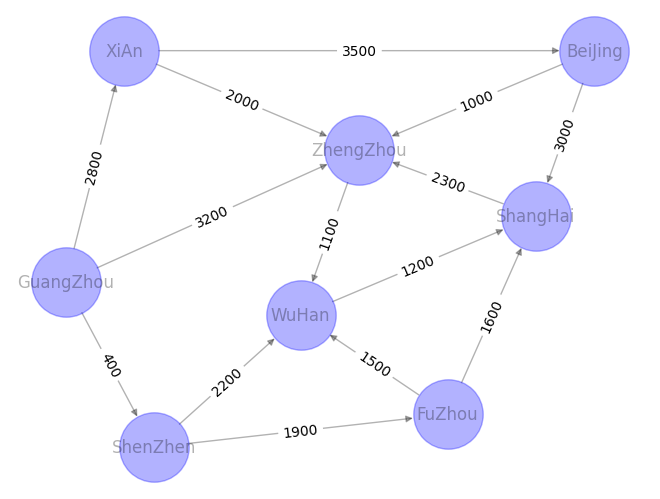

In [76]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np  # Import numpy library

def draw_graph(graph):
    G = nx.DiGraph()
    for v in graph.vs.values():
        G.add_node(v.key, pos=v.position)
    for e in graph.es.values():
        G.add_edge(e.v1.key, e.v2.key, weight=e.weight)
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_color='blue', node_size=2500, alpha=0.3)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

draw_graph(weg1)


S is connected to  Po Pa Ban Bal T


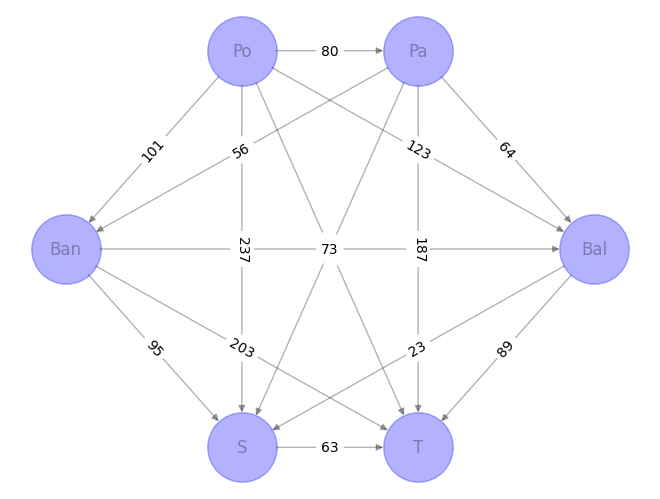

In [88]:
Kalimantan_nodes = (('Po',(2,5)),
                    ('Pa',(3,5)),
                    ('Ban',(1,3)),
                    ('Bal',(4,3)),
                    ('S',(2,1)),
                    ('T',(3,1))
                    )
Kalimantan_paths = (("Po", "Pa", 80),
                ("Po", "Ban", 101),
                ("Po", "Bal", 123),
                ("Po", "S", 237),
                ("Po", "T", 417),
                ("Pa", "Ban", 56),
                ("Pa", "Bal", 64),
                ("Pa", "S", 83),
                ("Pa", "T", 187),
                ("Ban", "Bal", 73),
                ("Ban", "S", 95),
                ("Ban", "T", 203),
                ("Bal", "S", 23),
                ("Bal", "T", 89),
                ("S", "T", 63))  

weg2 = Weight_edge_graph(Kalimantan_nodes,Kalimantan_paths)
#print(weg2)
print("S is connected to ", *[v.key for v in weg2.vs['S'].get_adjs()])
draw_graph(weg2)

In [101]:
from networkx.utils import UnionFind
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
uf = UnionFind(nodes)
uf.union('A', 'B')
uf['A'] == uf['B'] # True
uf.union('A', 'C')
uf.union('D', 'C')
uf.union('E', 'B')
for i in uf:
  print(i,uf[i])

A A
B A
C A
D A
E A
F F
G G
H H
I I


In [103]:
shippingCostMST = (("BeiJing", "ZhengZhou", 1000),
                   ("WuHan", "ShangHai", 1200),
                   ("ZhengZhou", "WuHan", 1100),
                   ("XiAn", "ZhengZhou", 2000),
                   ("GuangZhou", "ShenZhen", 400),
                   ("FuZhou", "WuHan", 1500),
                   ("ShenZhen", "FuZhou", 1900))
                   # Some data for the graph
cities = (
  ('BeiJing',(100,70)),
  ('ShangHai',(90,45)),
  ('GuangZhou',(10,35)),
  ('ShenZhen',(25,10)),
  ('XiAn',(20,70)),
  ('WuHan',(50,30)),
  ('ZhengZhou',(60,55)),
  ('FuZhou',(75,15)),
          )
highways = (('BeiJing','ShangHai',3000),
            ('BeiJing','ZhengZhou',1000),
            ('XiAn','BeiJing',3500),
            ('XiAn','ZhengZhou',2000),
            ('ZhengZhou','WuHan',1100),
            ('GuangZhou','XiAn',2800),
            ('WuHan','ShangHai',1200),
            ('ShangHai','ZhengZhou',2300),
            ('GuangZhou','ZhengZhou',3200),
            ('GuangZhou','ShenZhen',400),
            ('ShenZhen','WuHan',2200),
            ('ShenZhen','FuZhou',1900),
            ('FuZhou','ShangHai',1600),
            ('FuZhou','WuHan',1500),
            )

weg1 = Weight_edge_graph(cities,highways)
mst1 = Weight_edge_graph(cities,shippingCostMST)


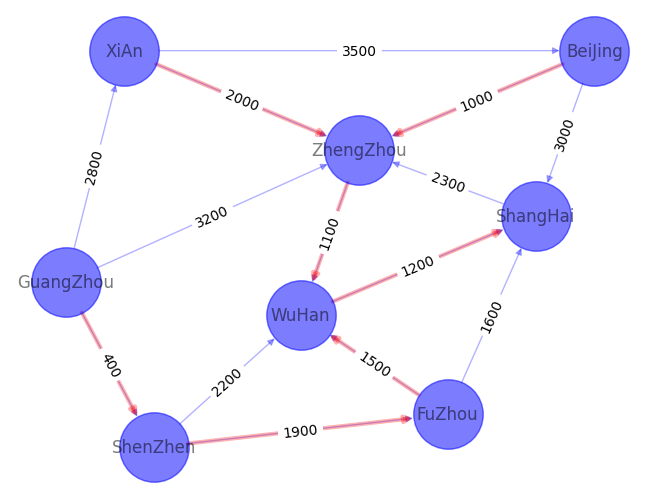

In [106]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_mst(weg, mst):
    G_weg = nx.DiGraph()
    for v in weg.vs.values():
        G_weg.add_node(v.key, pos=v.position)
    for e in weg.es.values():
        G_weg.add_edge(e.v1.key, e.v2.key, weight=e.weight)

    G_mst = nx.DiGraph()
    for v in mst.vs.values():
        G_mst.add_node(v.key, pos=v.position)
    for e in mst.es.values():
        G_mst.add_edge(e.v1.key, e.v2.key, weight=e.weight)

    pos = nx.get_node_attributes(G_weg, 'pos')

    nx.draw(G_weg, pos, with_labels=True, node_color='blue', node_size=2500, alpha=0.3, edge_color='blue')
    nx.draw(G_mst, pos, with_labels=True, node_color='blue', node_size=2500, alpha=0.3, edge_color='red',  width= 3)

    labels_weg = nx.get_edge_attributes(G_weg,'weight')
    nx.draw_networkx_edge_labels(G_weg, pos, edge_labels=labels_weg)

    labels_mst = nx.get_edge_attributes(G_mst,'weight')
    nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=labels_mst)

    plt.show()

draw_mst(weg1, mst1)

In [ ]:
from networkx.utils import UnionFind
from queue import Queue
class PrimMST:
  def __init__(self, graph):
    self.graph = graph # read in the input graph
    self.mst = Queue() # initialize an empty queue for mst edges
    self.uf = UnionFind(self.graph.vs.keys()) # initialize an empty union find list
    self.size = len(graph.vs) # the number of vertices 
    self.n_components = len(graph.vs) # the number of components of mst nodes

  def run_Prim(self):
    i_pass = 0
    min_edges =
    while self.n_components>1:
      
    return self.mst